<a href="https://colab.research.google.com/github/gabriellysilva-git/Bootcamp_WomakersCode/blob/main/Modelos_de_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Carregando o dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target_names[iris.target]

# Análise inicial
print("Primeiras linhas do dataset:")
print(iris_df.head())
print("\nInformações do dataset:")
print(iris_df.info())
print("\nEstatísticas descritivas:")
print(iris_df.describe())
print("\nContagem por espécie:")
print(iris_df['Species'].value_counts())

Primeiras linhas do dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Sp

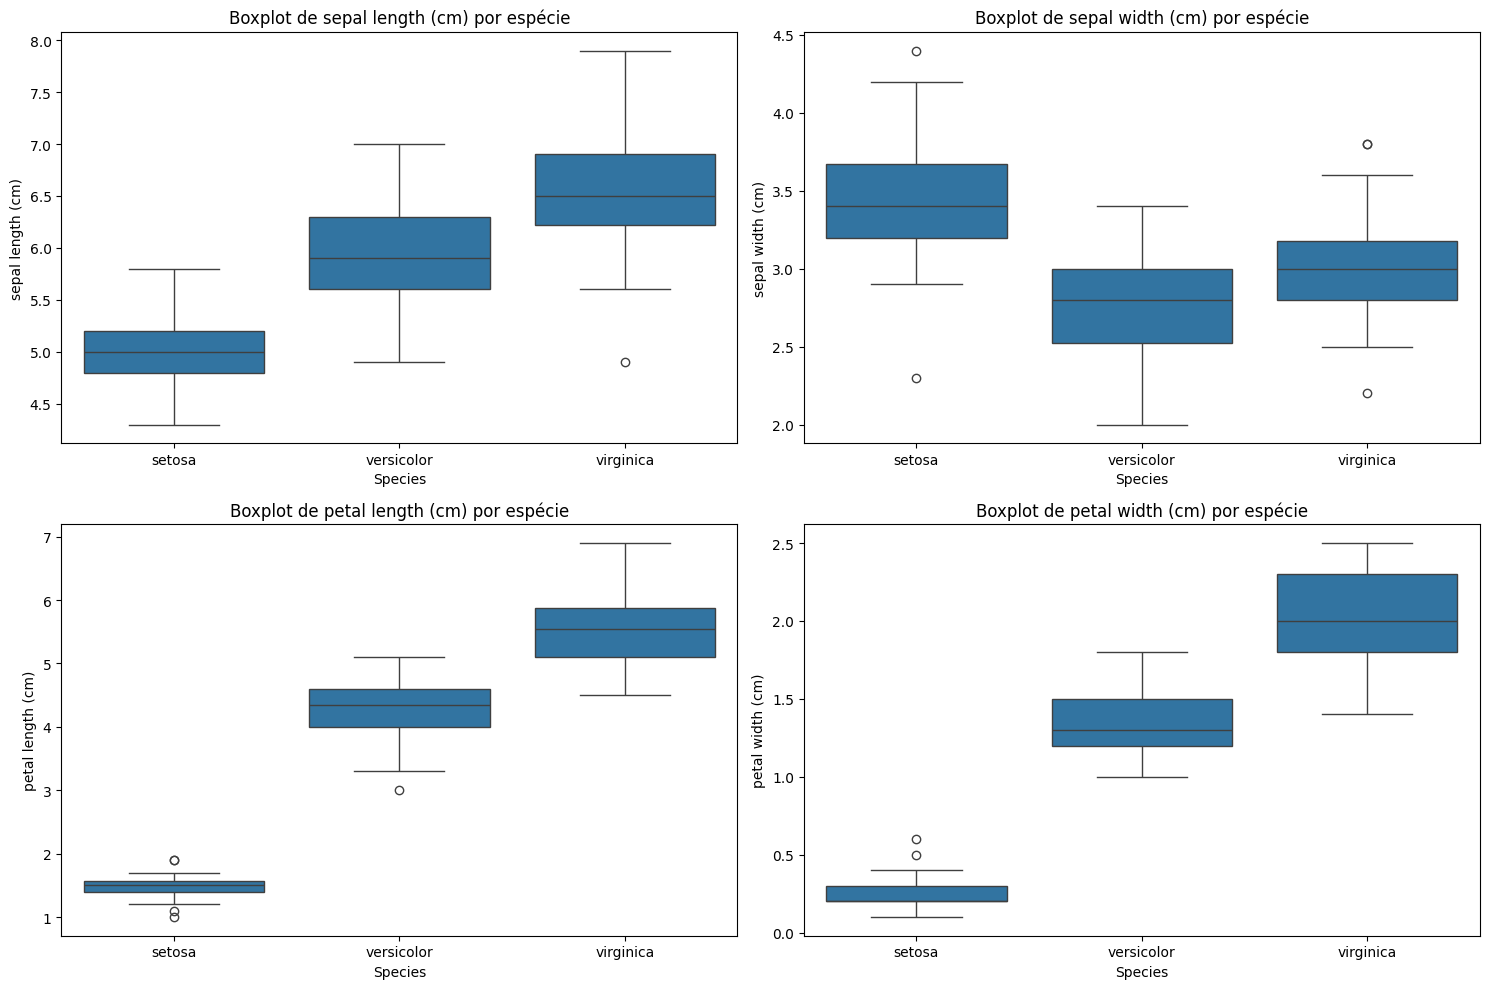

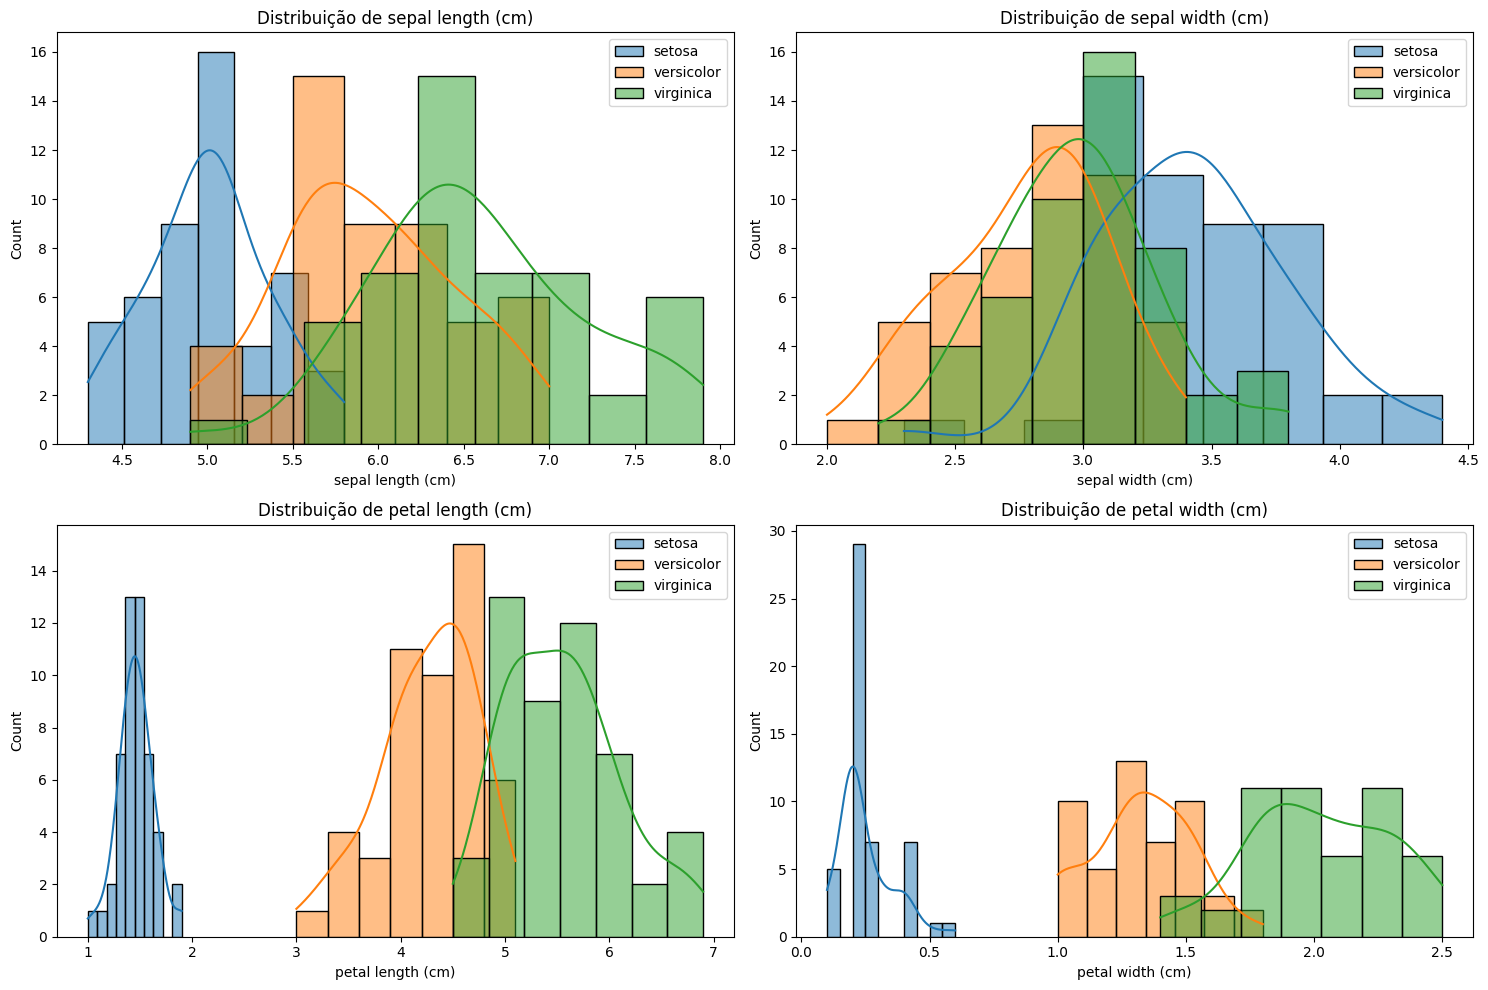

In [2]:
# Boxplot por espécie
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=iris_df)
    plt.title(f'Boxplot de {feature} por espécie')
plt.tight_layout()
plt.show()

# Histograma por espécie
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in iris.target_names:
        sns.histplot(iris_df[iris_df['Species']==species][feature],
                    label=species, alpha=0.5, kde=True)
    plt.title(f'Distribuição de {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Preparando os dados
X = iris.data
y = iris.target

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo
log_reg = LogisticRegression(max_iter=200, multi_class='ovr')
log_reg.fit(X_train, y_train)

# Fazendo previsões
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [5]:
# Calculando métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Acurácia: 0.96
Precisão: 0.96
Recall: 0.96

Relatório de classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



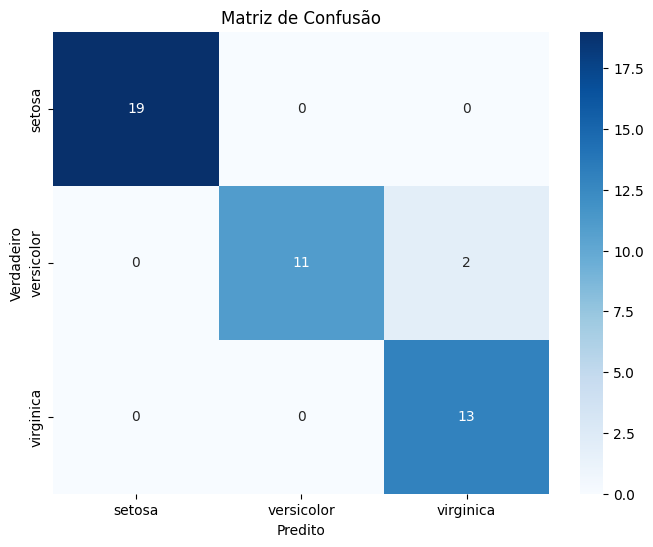

In [6]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [7]:
from sklearn.datasets import load_digits

# Carregando o dataset
digits = load_digits()
digits_df = pd.DataFrame(digits.data)
digits_df['target'] = digits.target

# Análise inicial
print("\nInformações do dataset Digits:")
print(f"Número total de amostras: {len(digits_df)}")
print(f"Número de características: {len(digits.feature_names)}")
print("\nVerificando dados nulos:")
print(digits_df.isnull().sum().sum())  # Deve retornar 0 se não houver nulos
print("\nTipos de dados:")
print(digits_df.dtypes.value_counts())  # Todos devem ser numéricos


Informações do dataset Digits:
Número total de amostras: 1797
Número de características: 64

Verificando dados nulos:
0

Tipos de dados:
float64    64
int64       1
Name: count, dtype: int64


In [8]:
# Preparando os dados
X_digits = digits.data
y_digits = digits.target

# Dividindo em treino e teste
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42)

# Criando e treinando o modelo
log_reg_digits = LogisticRegression(max_iter=1000, multi_class='ovr')
log_reg_digits.fit(X_train_d, y_train_d)

# Fazendo previsões
y_pred_d = log_reg_digits.predict(X_test_d)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
# Calculando métricas
accuracy_d = accuracy_score(y_test_d, y_pred_d)
precision_d = precision_score(y_test_d, y_pred_d, average='weighted')
recall_d = recall_score(y_test_d, y_pred_d, average='weighted')

print(f"\nAcurácia (Digits): {accuracy_d:.2f}")
print(f"Precisão (Digits): {precision_d:.2f}")
print(f"Recall (Digits): {recall_d:.2f}")
print("\nRelatório de classificação (Digits):")
print(classification_report(y_test_d, y_pred_d))


Acurácia (Digits): 0.96
Precisão (Digits): 0.96
Recall (Digits): 0.96

Relatório de classificação (Digits):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.94      0.92      0.93        50
           2       0.98      1.00      0.99        47
           3       0.98      0.94      0.96        54
           4       0.98      0.98      0.98        60
           5       0.95      0.94      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.80      0.95      0.87        43
           9       0.98      0.92      0.95        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



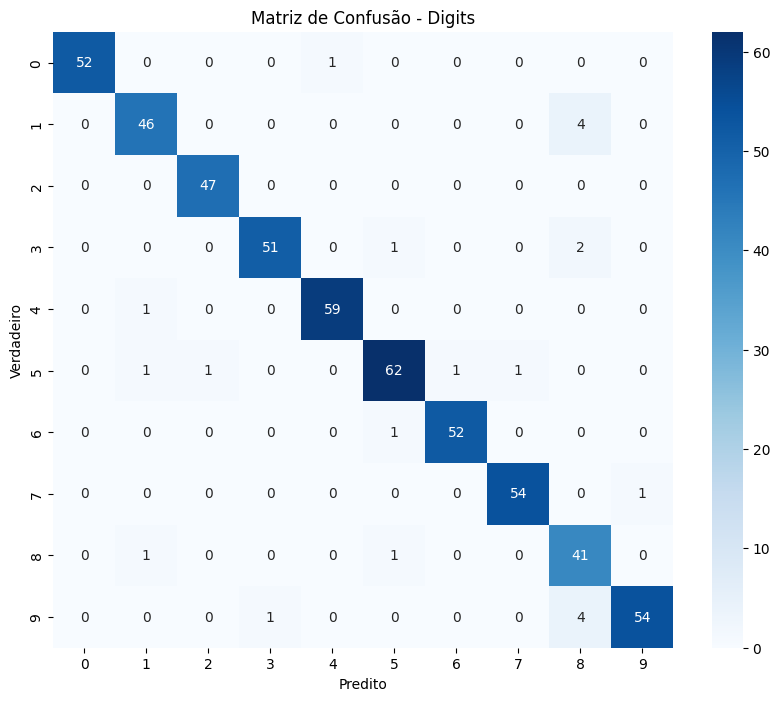

In [10]:
# Matriz de confusão
conf_matrix_d = confusion_matrix(y_test_d, y_pred_d)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_d, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Digits')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Acurácia (MNIST): 0.90
Precisão (MNIST): 0.90
Recall (MNIST): 0.90


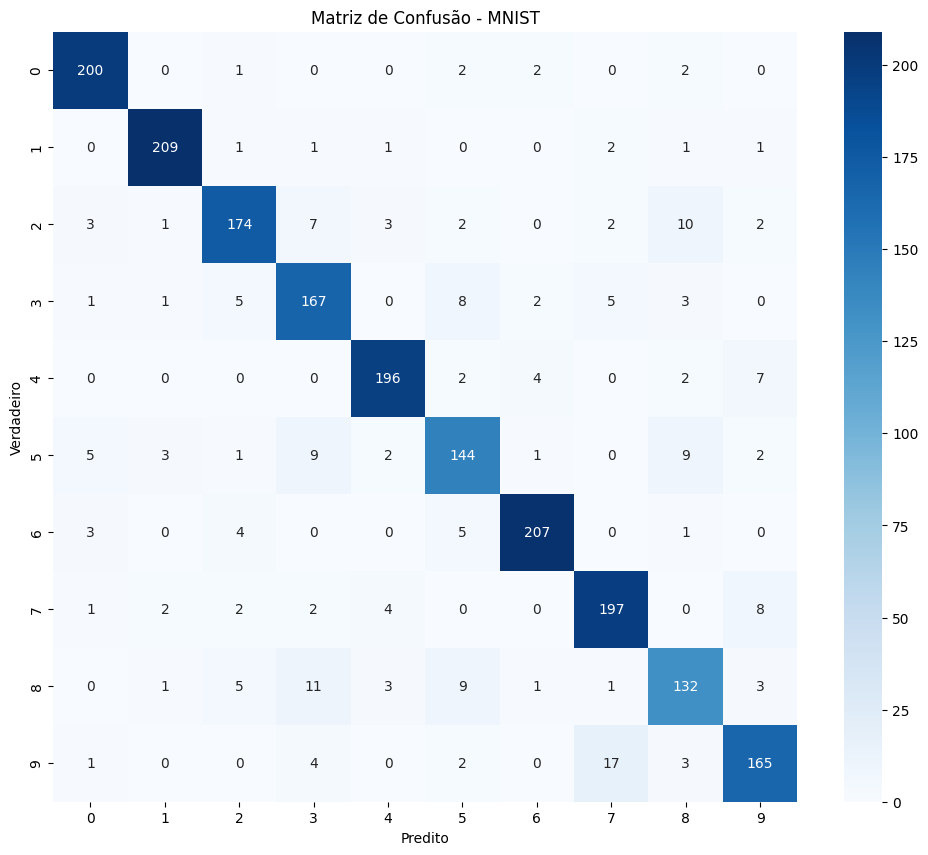

In [11]:
from sklearn.datasets import fetch_openml

# Carregando MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)

# Pegando apenas uma amostra para não sobrecarregar (opcional)
X_mnist = X_mnist[:10000]
y_mnist = y_mnist[:10000]

# Dividindo em treino e teste
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_mnist, y_mnist, test_size=0.2, random_state=42)

# Modelo de regressão logística
log_reg_mnist = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')
log_reg_mnist.fit(X_train_m, y_train_m)

# Previsões
y_pred_m = log_reg_mnist.predict(X_test_m)

# Métricas
accuracy_m = accuracy_score(y_test_m, y_pred_m)
precision_m = precision_score(y_test_m, y_pred_m, average='weighted')
recall_m = recall_score(y_test_m, y_pred_m, average='weighted')

print(f"\nAcurácia (MNIST): {accuracy_m:.2f}")
print(f"Precisão (MNIST): {precision_m:.2f}")
print(f"Recall (MNIST): {recall_m:.2f}")

# Matriz de confusão
conf_matrix_m = confusion_matrix(y_test_m, y_pred_m)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_m, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - MNIST')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()